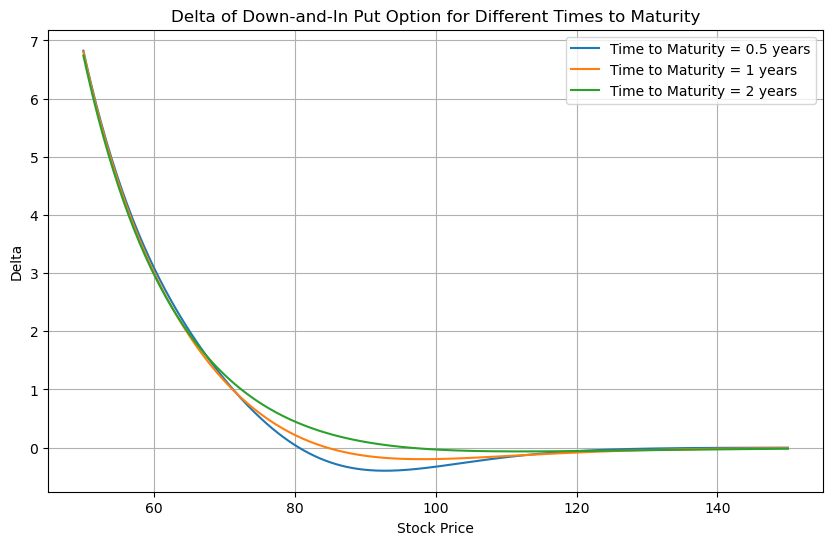

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def down_and_in_put_delta(S, K, H, T, r, sigma):
    """
    Calculate the delta of a down-and-in put option.

    Parameters:
    S (float): Current stock price
    K (float): Strike price
    H (float): Barrier level
    T (float): Time to maturity (in years)
    r (float): Risk-free interest rate
    sigma (float): Volatility of the underlying asset

    Returns:
    float: Delta of the down-and-in put option
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    d1_H = (np.log(H**2 / (S * K)) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2_H = d1_H - sigma * np.sqrt(T)

    delta = -norm.cdf(-d1) + (H / S)**(1 + 2 * r / sigma**2) * norm.cdf(d1_H)
    return delta

# Parameters
K = 100  # Strike price
H = 90   # Barrier level
r = 0.05 # Risk-free interest rate
sigma = 0.2 # Volatility

# Range of stock prices
S = np.linspace(50, 150, 400)

# Different times to maturity
T_values = [0.5, 1, 2]  # 6 months, 1 year, 2 years

# Plot the delta for different times to maturity
plt.figure(figsize=(10, 6))

for T in T_values:
    deltas = [down_and_in_put_delta(s, K, H, T, r, sigma) for s in S]
    plt.plot(S, deltas, label=f'Time to Maturity = {T} years')

plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta of Down-and-In Put Option for Different Times to Maturity')
plt.legend()
plt.grid(True)
plt.show()

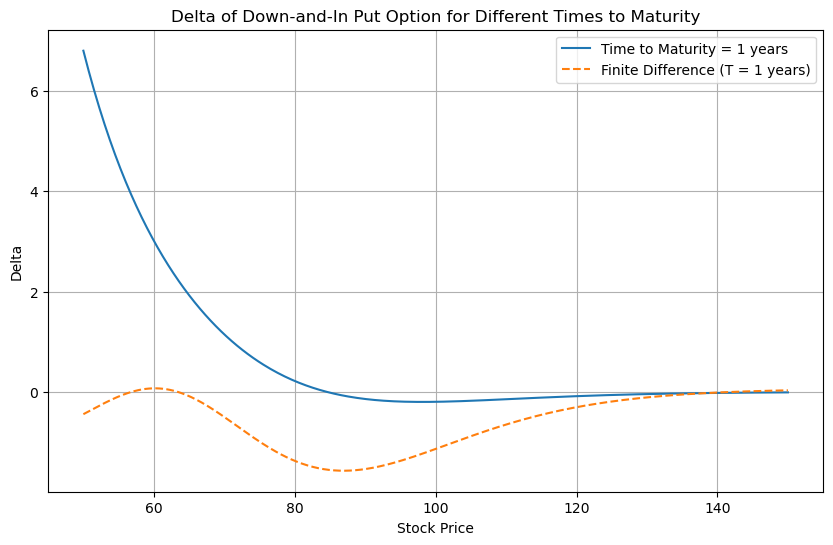

In [6]:
def down_and_in_put_price(S, K, H, T, r, sigma):
    """
    Calculate the price of a down-and-in put option.

    Parameters:
    S (float): Current stock price
    K (float): Strike price
    H (float): Barrier level
    T (float): Time to maturity (in years)
    r (float): Risk-free interest rate
    sigma (float): Volatility of the underlying asset

    Returns:
    float: Price of the down-and-in put option
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    d1_H = (np.log(H**2 / (S * K)) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2_H = d1_H - sigma * np.sqrt(T)

    price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1) + K * (H / S)**(1 + 2 * r / sigma**2) * np.exp(-r * T) * norm.cdf(-d2_H) - S * (H / S)**(1 + 2 * r / sigma**2) * norm.cdf(-d1_H)
    return price


def down_and_in_put_delta_finite_difference(S, K, H, T, r, sigma):
    """
    Calculate the delta of a down-and-in put option using the finite difference method.

    Parameters:
    S (float): Current stock price
    K (float): Strike price
    H (float): Barrier level
    T (float): Time to maturity (in years)
    r (float): Risk-free interest rate
    sigma (float): Volatility of the underlying asset

    Returns:
    float: Delta of the down-and-in put option
    """
    epsilon = 1e-5
    delta = (down_and_in_put_price(S + epsilon, K, H, T, r, sigma) - down_and_in_put_price(S - epsilon, K, H, T, r, sigma)) / (2 * epsilon)
    return delta


# Parameters
K = 100  # Strike price
H = 90   # Barrier level
r = 0.05 # Risk-free interest rate
sigma = 0.2 # Volatility

# Range of stock prices
S = np.linspace(50, 150, 400)

# Different times to maturity
T_values = [1]  # 6 months, 1 year, 2 years

# Plot the delta for different times to maturity
plt.figure(figsize=(10, 6))

for T in T_values:
    deltas = [down_and_in_put_delta(s, K, H, T, r, sigma) for s in S]
    deltas_fd = [down_and_in_put_delta_finite_difference(s, K, H, T, r, sigma) for s in S]
    plt.plot(S, deltas, label=f'Time to Maturity = {T} years')
    plt.plot(S, deltas_fd, '--', label=f'Finite Difference (T = {T} years)')

plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta of Down-and-In Put Option for Different Times to Maturity')
plt.legend()
plt.grid(True)
plt.show()

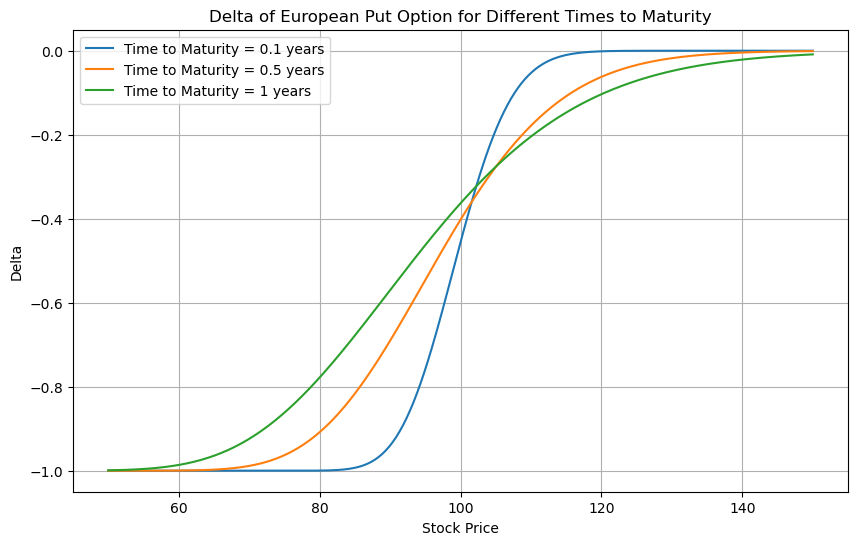

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def put_option_delta(S, K, T, r, sigma):
    """
    Calculate the delta of a European put option.

    Parameters:
    S (float): Current stock price
    K (float): Strike price
    T (float): Time to maturity (in years)
    r (float): Risk-free interest rate
    sigma (float): Volatility of the underlying asset

    Returns:
    float: Delta of the European put option
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    delta = -norm.cdf(-d1)
    return delta

# Parameters
K = 100  # Strike price
r = 0.05 # Risk-free interest rate
sigma = 0.2 # Volatility

# Range of stock prices
S = np.linspace(50, 150, 400)

# Different times to maturity
T_values = [0.1, 0.5, 1]  # 6 months, 1 year, 2 years

# Plot the delta for different times to maturity
plt.figure(figsize=(10, 6))

for T in T_values:
    deltas = [put_option_delta(s, K, T, r, sigma) for s in S]
    plt.plot(S, deltas, label=f'Time to Maturity = {T} years')

plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta of European Put Option for Different Times to Maturity')
plt.legend()
plt.grid(True)
plt.show()